# K-means
É um algoritmo não hierárquico. Seguindo os seguintes passos:


1.   Divida os dados em K grupos com centróides ciradas aleatoriamente
2.   Repita até que acondição seja satisfeita:

*   | calcule a distância de cada objeto ao centróide
*   | atribbuir o objeto ao grupo com menor distância ao centróide
*   | atualize o centróide de cada grupo

## Importando as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carregando os Dados

In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Análise Exploratórias Rápida

In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


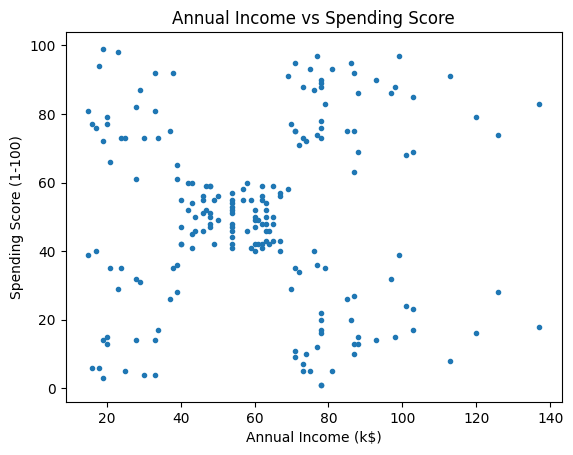

In [10]:
plt.scatter(df["Annual Income (k$)"], df['Spending Score (1-100)'], marker='.')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

In [12]:
X = df[["Annual Income (k$)", 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Implementando o K-means

In [13]:
from sklearn.cluster import KMeans

In [14]:
model_kmeans = KMeans(n_clusters=5, init='k-means++')

In [16]:
y_kmeans = model_kmeans.fit_predict(X)

In [17]:
y_kmeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [18]:
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
120,67,56
121,67,40
122,69,58
126,71,35


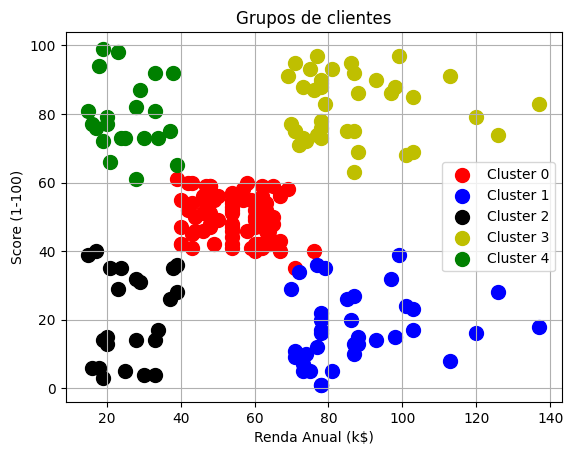

In [22]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()

## Aplicando a clusterização para AGE e Spending Score

In [23]:
df_age = df[["Age", 'Spending Score (1-100)']]
df_age.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


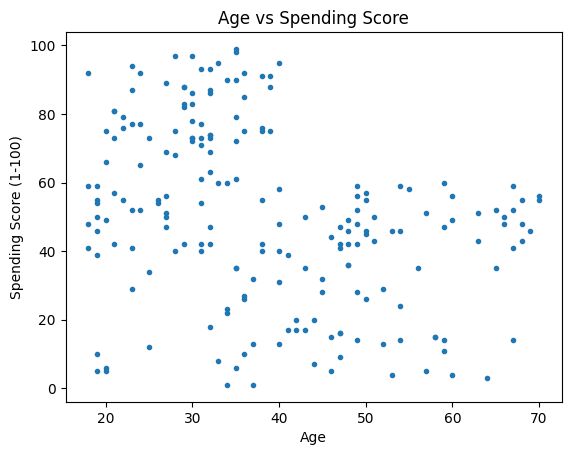

In [24]:
plt.scatter(df_age["Age"], df_age['Spending Score (1-100)'], marker='.')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()

In [25]:
model_kmeans_2 = KMeans(n_clusters=5, init='k-means++')

In [27]:
y_kmeans_2 = model_kmeans_2.fit_predict(df_age)
y_kmeans_2

array([3, 0, 1, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 3, 3, 4, 0, 3, 0,
       4, 0, 4, 0, 1, 3, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       4, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 1, 0, 2, 0, 4, 0, 4, 0,
       3, 0, 1, 0, 4, 0, 1, 0, 4, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 1, 3, 1, 0, 1, 0, 4, 0,
       4, 0, 4, 0, 1, 0, 4, 0, 3, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0,
       1, 0], dtype=int32)

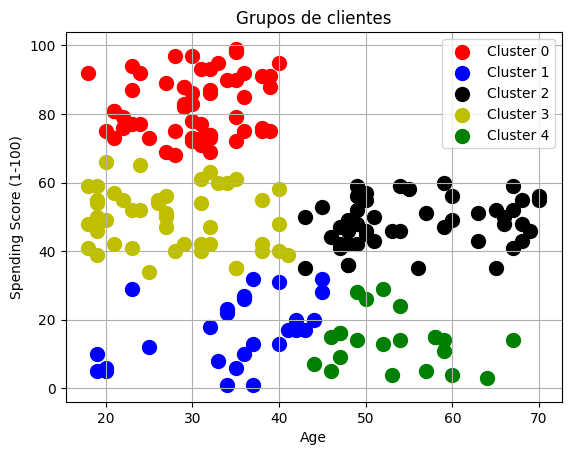

In [28]:
for k in range(k_grupos):
    cluster = df_age[y_kmeans_2 == k]
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')
plt.title('Grupos de clientes')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.legend()
plt.show()